## Travaux Pratiques Apprentissage Automatique

de Valentine Gilbart M2.2 BIMS 2022

### Chargement des fonctions


In [26]:
from tp import *

Le dossier `tp/` contient les scripts permettant de lancer les méthodes de classification, ainsi que l'évaluation de leur performance. 

### Présentation des jeux de données

Il y a 3 jeux de données, chacun avec 5 classes.

#### Données 1
Le jeu de donnée 1 semble être un cas assez idéal pour faire la classification statistique, les 5 classes sont assez bien délimitées.

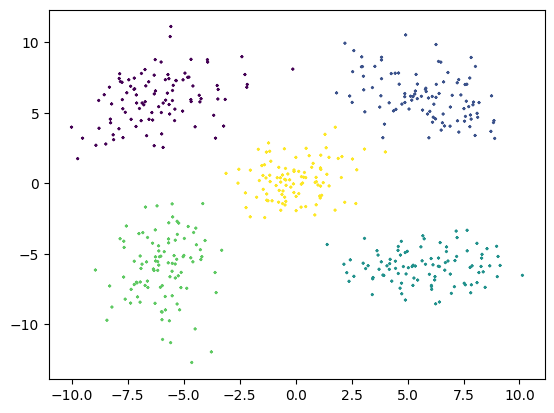

In [27]:
data=1
filename = "Archive/data_tp" + str(data)
X_train, y_train = read_file(filename + '_app.txt')
X_test, y_test = read_file(filename+'_dec.txt')

fig = plt.figure()
plt.scatter(X_train[:,0], X_train[:,1], c=y_train, marker = "x", s=2)
plt.close()
fig

#### Données 2

Le jeu de donnée 2 est un peu plus complexe, avec des délimitations entre les classes plus floues. C'est par exemple le cas de la classe 3 (vert canard au milieu) qui a des points qui se mélangent avec ceux de la classe 5 (jaune). Mais, en dehors de certains points aux extrémités des classes, la classification devrait être possible.

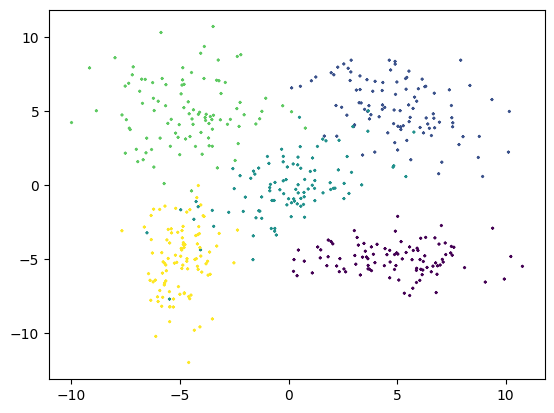

In [28]:
data=2
filename = "Archive/data_tp" + str(data)
X_train, y_train = read_file(filename + '_app.txt')
X_test, y_test = read_file(filename+'_dec.txt')

fig = plt.figure()
plt.scatter(X_train[:,0], X_train[:,1], c=y_train, marker = "x", s=2)
plt.close()
fig

#### Données 3

Le jeu de donnée 3 est clairement plus complexe pour faire de la classification. On retrouve les 5 classes (haut-droite, haut-gauche, bas-droit, bas-gauche, milieu) mais les classes sont très mal délimitées. On s'attend donc à avoir beaucoup d'erreur de classification avec ce jeu de données. 

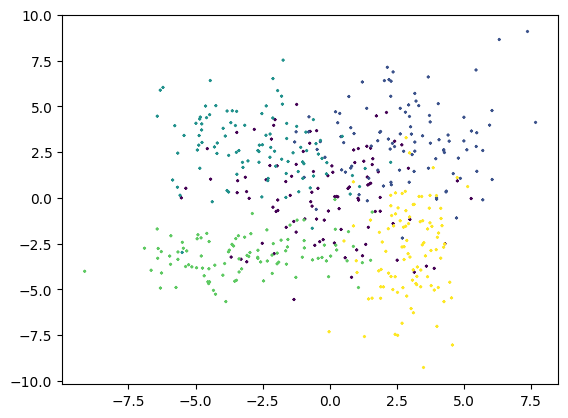

In [29]:
data=3
filename = "Archive/data_tp" + str(data)
X_train, y_train = read_file(filename + '_app.txt')
X_test, y_test = read_file(filename+'_dec.txt')

fig = plt.figure()
plt.scatter(X_train[:,0], X_train[:,1], c=y_train, marker = "x", s=2)
plt.close()
fig

### Estimation de gaussiennes

Le classifieur utilise par défaut la distance euclidienne minimum. Mais il est aussi possible d'utiliser la distance de Mahalanobis minimum. 

#### Données 1

Applying to data 1 

### Euclidian :
Top 1 : 0.992
Top 2 : 1.0

Confusion matrix :
Order of the classes : [1. 2. 3. 4. 5.]
Column: Classification & Row: Truth
[[ 98.   0.   0.   0.   2.]
 [  0. 100.   0.   0.   0.]
 [  0.   0.  99.   1.   0.]
 [  0.   0.   0. 100.   0.]
 [  1.   0.   0.   0.  99.]]


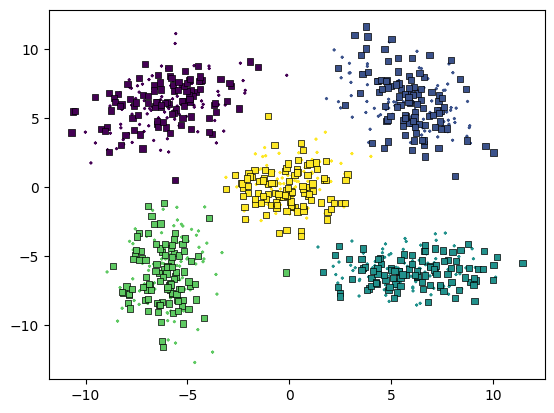

In [30]:
dic = apply_estim_gauss_to_data(data=1, euclidian = True, mahalanobis = False, verbrose=True)
dic["estim_gauss_euclidian"]["plot"]

Applying to data 1 


### Mahalanobis :
Top 1 : 0.996
Top 2 : 0.998

Confusion matrix :
Order of the classes : [1. 2. 3. 4. 5.]
Column: Classification & Row: Truth
[[ 99.   0.   0.   0.   1.]
 [  0. 100.   0.   0.   0.]
 [  0.   0. 100.   0.   0.]
 [  0.   0.   0. 100.   0.]
 [  0.   0.   0.   1.  99.]]


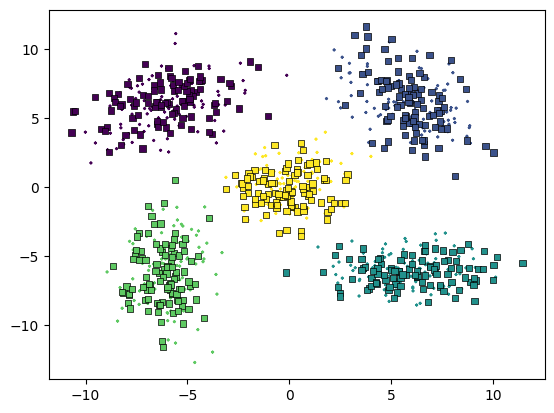

In [31]:
dic = apply_estim_gauss_to_data(data=1, euclidian = False, mahalanobis = True, verbrose=True)
dic["estim_gauss_mahalanobis"]["plot"]

Avec les données 1, les résultats de classification par l'estimation de gaussiennes sont très bons. Les top1 sont supérieurs à 0,99.
La distance de Mahalanobis donne de légers meilleurs résutats en top1, et celle euclidienne est meilleure en top 2. 

La matrice de confusion indique que des points en première et dernière classes ont été mal classés. On voit notamment le fait que le groupe 5 (qui correspond aux points jaunes au milieu) est la cause d'erreurs de classification. 



#### Données 2

Applying to data 2 

### Euclidian :
Top 1 : 0.946
Top 2 : 0.996

Confusion matrix :
Order of the classes : [1. 2. 3. 4. 5.]
Column: Classification & Row: Truth
[[100.   0.   0.   0.   0.]
 [  2.  97.   1.   0.   0.]
 [  0.   5.  84.   1.  10.]
 [  0.   0.   6.  94.   0.]
 [  0.   0.   2.   0.  98.]]


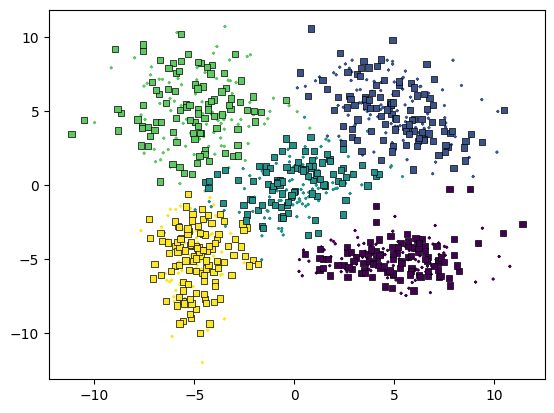

In [32]:
dic = apply_estim_gauss_to_data(data=2, euclidian = True, mahalanobis = False, verbrose=True)
dic["estim_gauss_euclidian"]["plot"]

Applying to data 2 


### Mahalanobis :
Top 1 : 0.946
Top 2 : 0.994

Confusion matrix :
Order of the classes : [1. 2. 3. 4. 5.]
Column: Classification & Row: Truth
[[99.  0.  1.  0.  0.]
 [ 0. 95.  5.  0.  0.]
 [ 1.  4. 88.  1.  6.]
 [ 0.  0.  3. 96.  1.]
 [ 0.  0.  5.  0. 95.]]


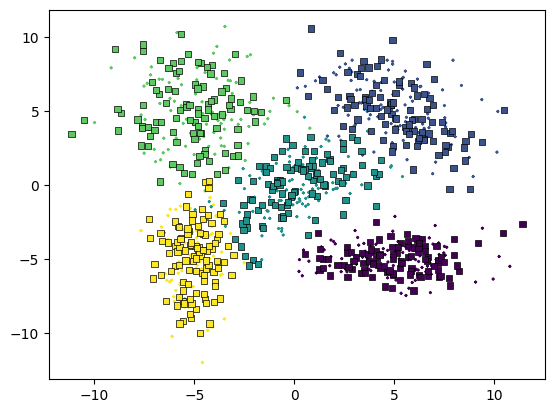

In [33]:
dic = apply_estim_gauss_to_data(data=2, euclidian = False, mahalanobis = True, verbrose=True)
dic["estim_gauss_mahalanobis"]["plot"]

Avec les données 2, les résultats sont toujours assez bons, avec des top1 à 0,946 et des top2 supérieurs à 0,99 pour les deux distances.

Avec la distance euclidienne, il y a de nombreux points appartenant à la classe 3 (vert canard au milieu) qui sont mal classés en 5 (jaune en bas à gauche).

Avec la distance de Mahalanobis, il y a ce même problème, mais aussi des points de classe 2 (bleu foncé en haut à droite) mal classés en 3. 

Encore une fois, c'est la classe 3 qui pose problème lors de la classification, car ses délimitations sont assez floues.

#### Données 3

Applying to data 3 

### Euclidian :
Top 1 : 0.728
Top 2 : 0.892

Confusion matrix :
Order of the classes : [1. 2. 3. 4. 5.]
Column: Classification & Row: Truth
[[43. 17. 16. 12. 12.]
 [12. 83.  3.  0.  2.]
 [16.  4. 78.  2.  0.]
 [16.  0.  7. 74.  3.]
 [ 5.  9.  0.  0. 86.]]


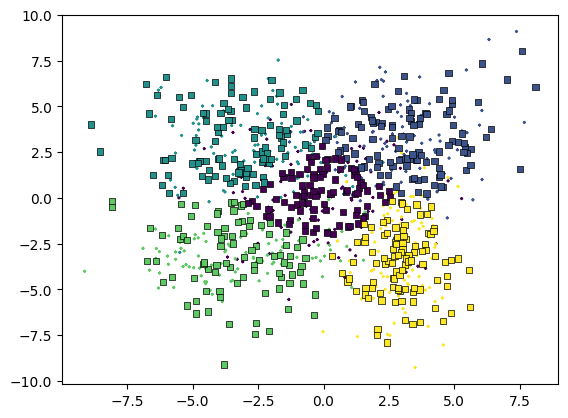

In [34]:
dic = apply_estim_gauss_to_data(data=3, euclidian = True, mahalanobis = False, verbrose=True)
dic["estim_gauss_euclidian"]["plot"]

Applying to data 3 


### Mahalanobis :
Top 1 : 0.698
Top 2 : 0.872

Confusion matrix :
Order of the classes : [1. 2. 3. 4. 5.]
Column: Classification & Row: Truth
[[38. 20. 17. 12. 13.]
 [ 7. 83.  5.  0.  5.]
 [14.  4. 81.  1.  0.]
 [29.  0. 10. 59.  2.]
 [ 5.  7.  0.  0. 88.]]


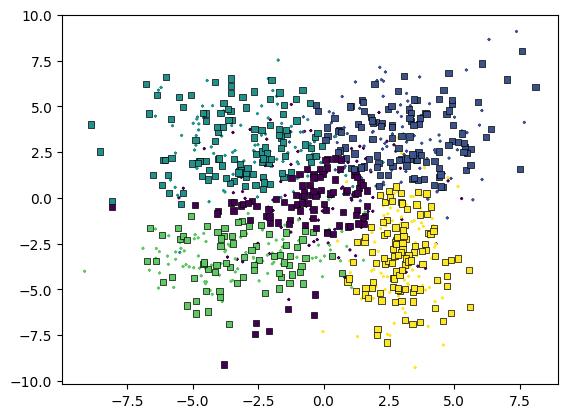

In [35]:
dic = apply_estim_gauss_to_data(data=3, euclidian = False, mahalanobis = True, verbrose=True)
dic["estim_gauss_mahalanobis"]["plot"]

Les résultats ne sont pas aussi bons sur ce jeu de donnée. Le top 1 est d'envrion 0,7, et le top 2 0,88 pour les deux distances.
La distance euclidienne donne de légers meilleurs résultats en top 1 et 2 que la distance de Mahalanobis. 

Les points de la classe 1 (violet au centre) semblent les plus durs à classer au vu de la matrice de confusion (euclidienne : 43 points bien classés sur 100 ; Mahalanobis : 38/100). De plus, de nombreux points d'autres classes sont classés à tort dans la classe 1 (cf la colonne 1 de la matrice de confusion). Cette classe est donc problématique car il est difficile de bien classer les points qui lui appartiennent, mais aussi car elle participe à la mauvaise classification de points d'autres classes.

La classe 3 (vert canard en haut à gauche) pose aussi problème avec la distance de Mahalanobis, puisque seulement 59 points sur 100 de la classe 3 sont bien classés.


#### Conclusion

Si l'on compare les performances de la classification sur les 3 jeux de données, on remarque qu'on obtient de bien meilleurs résultats avec les données 1, et que les pires résultats sont trouvés avec les données 3. C'est ce à quoi on pouvait s'attendre au vu des données d'entraînements. En effet, lors de la présentation des jeux de données, on a vu que les classes des données 1 sont très bien séparées, contrairement à celles des données 3.

Avec les jeux de données étudiés, il ne semble pas y avoir de distance qui donne toujours de meilleurs résultats. 

### Kppv

Le principe est de faire voter les K plus proches voisins de x pour savoir à quelle classe x appartient. 

K est un paramètre fixé par l'utilisateur. Pour évaluer quel est le meilleur K pour un jeu de donnée, on utilise la méthode de Cross Validation (ici 5-CV). 


#### Données 1

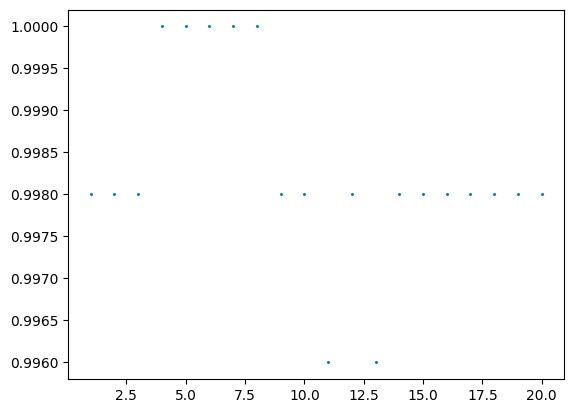

In [36]:
x = range(1,21,1)
dic = apply_CV_kppv_to_data(data=1, k_range=x, verbrose=False)

tops1=[]
for i in dic: 
    tops1.append(dic[i]['top1mean'])

fig = plt.figure()
plt.scatter(x, tops1, marker = "x", s=2)
plt.close()
fig

Le plot représente la valeur du top1 en fonction du K choisi. Cela permet d'évaluer quel K est le plus adapté pour nos données.

A K=1, on a un top1 de 0.998. 
A partir de K=4, on obtient un résultat de top1 et top2 de 1,0. 
Si on augmente K au-delà de 8, on commence à faire redescendre le top1. 

Malgré tout les résultats sont excellents, même en K=1. 

#### Données 2

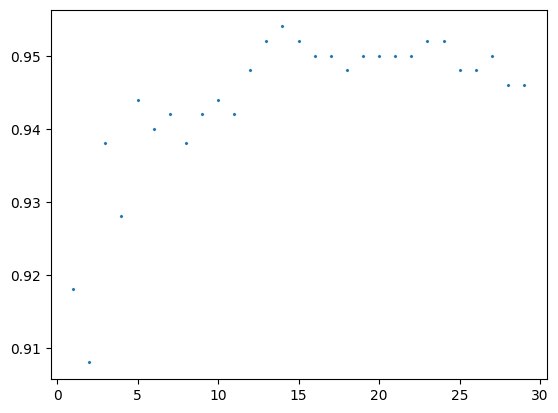

In [37]:
x = range(1,30,1)
dic = apply_CV_kppv_to_data(data=2, k_range=x, verbrose=False)

tops1=[]
for i in dic: 
    tops1.append(dic[i]['top1mean'])

fig = plt.figure()
plt.scatter(x, tops1, marker = "x", s=2)
plt.close()
fig

In [38]:
print("Top 1 en 1-ppv : ", dic['1-ppv']['top1mean'])
print("Top 1 en 5-ppv : ", dic['5-ppv']['top1mean'])
print("Top 1 en 15-ppv : ", dic['15-ppv']['top1mean'])

Top 1 en 1-ppv :  0.9179999999999999
Top 1 en 5-ppv :  0.944
Top 1 en 15-ppv :  0.952


Le top 1 en K=1 est de 0,917. C'est un peu moins bon que l'estimation de gaussiennes (0,946), mais tout de même très bon.

En K=5 on obtient 0,944, ce qui nous ramène aussi bon que l'estimation de gaussiennes. Avec K=15, on augmente légèrement le top 1 aussi. Au-delà, il ne semble pas y avoir de nette amélioration de la classification. 


#### Données 3

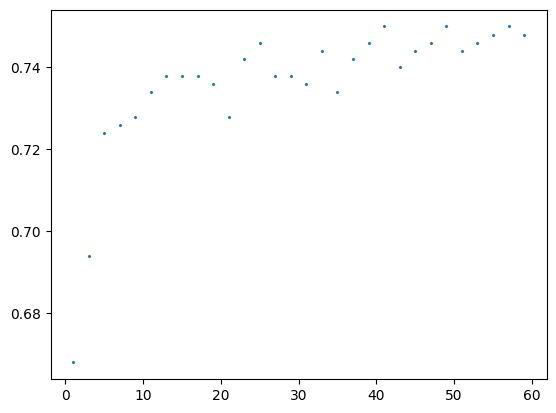

In [39]:
x = range(1, 60, 2)
dic = apply_CV_kppv_to_data(data=3, k_range=x, verbrose=False)

tops1=[]
for i in dic: 
    tops1.append(dic[i]['top1mean'])

fig = plt.figure()
plt.scatter(x, tops1, marker = "x", s=2)
plt.close()
fig

In [40]:
print("Top 1 en 1-ppv : ",dic['1-ppv']['top1mean'])
print("Top 2 en 1-ppv : ",dic['1-ppv']['top2mean'])

print("Top 1 en 7-ppv : ",dic['7-ppv']['top1mean'])
print("Top 1 en 59-ppv : ",dic['59-ppv']['top1mean'])

Top 1 en 1-ppv :  0.668
Top 2 en 1-ppv :  0.818
Top 1 en 7-ppv :  0.726
Top 1 en 59-ppv :  0.748


La classification avec K=1 a un top 1 de 0,668, ce qui n'est pas très bon, et un top 2 de 0,818. On voit que lorsque l'on augmente le K, à partir de 7, on obtient une meilleure classification. Cependant, augmenter énormement le K (ici, jusqu'à 60) ne permet pas une nette amélioration.

Le top 1 à partir de K=7 est similaire à celui de l'estimation gaussienne par la distance euclidienne (0,726 et 0,728 respectivement).

#### Conclusion

De manière générale, on remarque qu'augmenter le K au-delà de 10 n'offre pas de nette amélioration de la classification sur ces jeux de données. 

En choisissant bien son K, les résultats obtenus sont comparables à ceux de l'estimation de gaussiennes. 

### Séparation linéaire

Le principe est de chercher un hyperplan qui sépare une classe d'une autre (one-vs-one), ou une classe de toutes les autres (one-vs-all).

Pour les données 2 et 3 en one-vs-one, il nous faut rajouter un seuil d'erreur afin de converger vers une solution.
Pour le one-vs-all, on supprime la classe correspondant aux points du centre des 3 jeux de données. 

#### Données 1

Applying to data 1 

### Linear SVM one_vs_one :
Top 1 : 0.994
Top 2 : 0.998

Confusion matrix :
Order of the classes : [1. 2. 3. 4. 5.]
Column: Classification & Row: Truth
[[ 99.   0.   0.   0.   1.]
 [  0. 100.   0.   0.   0.]
 [  0.   0.  99.   1.   0.]
 [  0.   0.   0. 100.   0.]
 [  1.   0.   0.   0.  99.]]


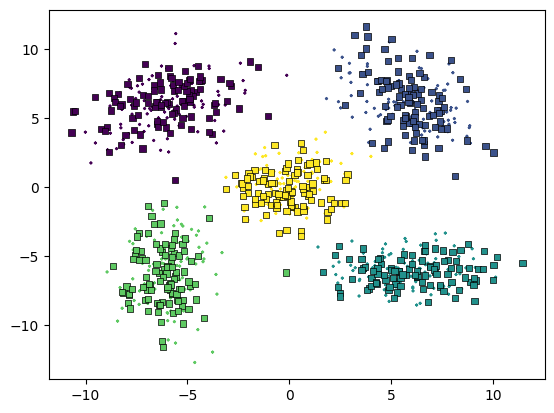

In [41]:
dic = apply_SVM_to_data(data=1, error = 0, one_vs_one = True, verbrose=True) 
dic["LSVM"]["plot"]

Applying to data 1 

### Linear SVM one_vs_all :
Top 1 : 0.9125
Top 2 : 0.9725

Confusion matrix :
Order of the classes : [1. 2. 3. 4.]
Column: Classification & Row: Truth
[[100.   0.   0.   0.]
 [ 24.  71.   5.   0.]
 [  4.   0.  95.   1.]
 [  1.   0.   0.  99.]]
Applying to data 1 

### Linear SVM one_vs_all :
Top 1 : 0.99
Top 2 : 0.99

Confusion matrix :
Order of the classes : [1. 2. 3. 4.]
Column: Classification & Row: Truth
[[100.   0.   0.   0.]
 [  0. 100.   0.   0.]
 [  2.   0.  97.   1.]
 [  1.   0.   0.  99.]]


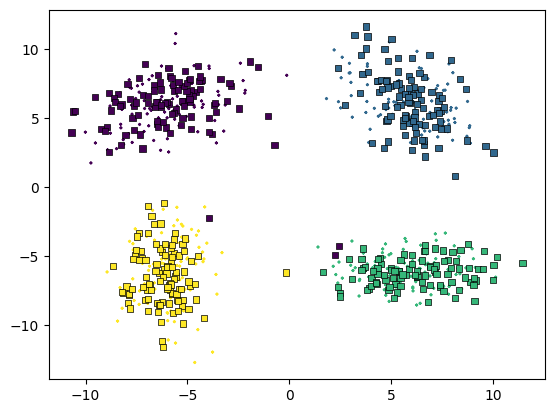

In [42]:
dic = apply_SVM_to_data(data=1, error = 25, one_vs_one = False, verbrose=True) 

dic = apply_SVM_to_data(data=1, error = 5, one_vs_one = False, verbrose=True) 
dic["LSVM"]["plot"]

La méthode de séparation linéaire donne d'excellents résultats, avec un top 1 d'environ 0,99 en one-vs-one comme en one-vs-all.

Pour le one-vs-all, il a fallu ajouter une marge d'erreur lors de l'apprentissage pour converger vers une solution. Cela signifie que l'on garde l'hyperplan si 495 des points sont bien classés (1% d'erreur).
En augmentant le taux d'erreur (à 5% avec 25 points mal classés autorisés par exemple), l'apprentissage est moins bon et le résultat final en top1 baisse aussi. 

#### Données 2

Applying to data 2 

### Linear SVM one_vs_one :
Top 1 : 0.906
Top 2 : 0.99

Confusion matrix :
Order of the classes : [1. 2. 3. 4. 5.]
Column: Classification & Row: Truth
[[ 96.   0.   4.   0.   0.]
 [  2.  91.   1.   6.   0.]
 [  0.   6.  71.   8.  15.]
 [  0.   0.   4.  95.   1.]
 [  0.   0.   0.   0. 100.]]


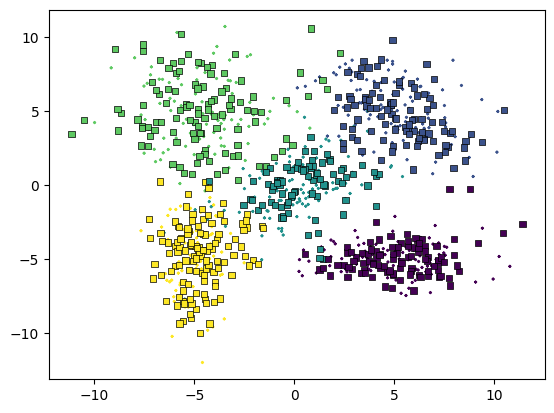

In [43]:
dic = apply_SVM_to_data(data=2, error = 12, one_vs_one = True, verbrose=True) 
dic["LSVM"]["plot"]

Applying to data 2 

### Linear SVM one_vs_all :
Top 1 : 0.8425
Top 2 : 0.905

Confusion matrix :
Order of the classes : [1. 2. 4. 5.]
Column: Classification & Row: Truth
[[86.  0.  0. 14.]
 [11. 63. 26.  0.]
 [10.  0. 89.  1.]
 [ 1.  0.  0. 99.]]


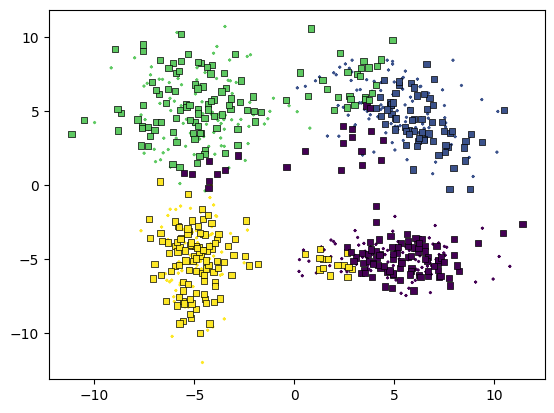

In [44]:
dic = apply_SVM_to_data(data=2, error = 50, one_vs_one = False, verbrose=True)
dic["LSVM"]["plot"]

La méthode one-vs-one avec les données 2 nécessite d'ajouter une marge d'erreur lors de l'apprentissage. Cela signifie que sur les 200 points utilisés pour créer l'hyperplan entre 2 classes, si moins de 12 points sont mal classés (6% d'erreur), on garde l'hyperplan trouvé. 

Pour la méthode one-vs-all, on a autorisé 50 points mal classés (10% d'erreur). 

La méthode one-vs-one donne de meilleurs résultats en top1 que one-vs-all sur les données 2 (respectivement 0,90 et 0,84). Cela n'est pas étonnant, puisqu'on a dû augmenter le taux d'erreur pour l'apprentissage de la méthode one-vs-all. 

En regardant les classifications de one-vs-all dans le détail, on voit que la classe 2 (bleu sur le graphe) a posé beaucoup le plus de soucis. 
Mais le fait que cette méthode fonctionne moins bien est dû aux données, car en regardant le graphe, on voit qu'il n'est pas possible de trouver des droites qui séparent bien une classe du reste. 


#### Données 3

Applying to data 3 

### Linear SVM one_vs_one :
Top 1 : 0.646
Top 2 : 0.832

Confusion matrix :
Order of the classes : [1. 2. 3. 4. 5.]
Column: Classification & Row: Truth
[[ 9.  8. 30. 18. 35.]
 [ 2. 44. 12.  0. 42.]
 [ 2.  2. 88.  5.  3.]
 [ 2.  0. 10. 84.  4.]
 [ 1.  1.  0.  0. 98.]]


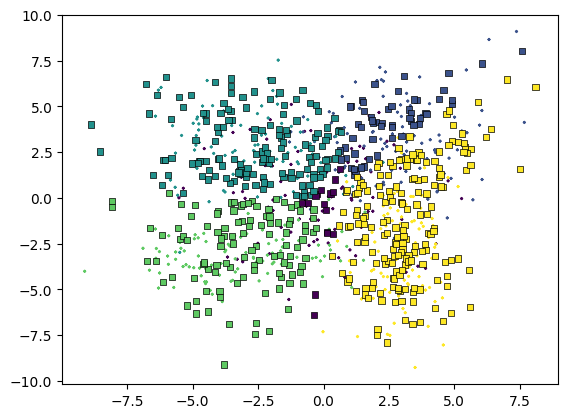

In [45]:
dic = apply_SVM_to_data(data=3, error = 50, one_vs_one = True, verbrose=True) 
dic["LSVM"]["plot"]

Applying to data 3 

### Linear SVM one_vs_all :
Top 1 : 0.3875
Top 2 : 0.6425

Confusion matrix :
Order of the classes : [2. 3. 4. 5.]
Column: Classification & Row: Truth
[[ 8.  4.  0. 88.]
 [10. 86.  0.  4.]
 [28. 66.  6.  0.]
 [45.  0.  0. 55.]]


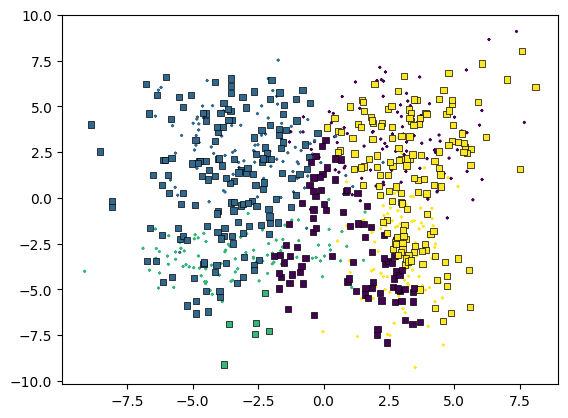

In [46]:
dic = apply_SVM_to_data(data=3, error = 150, one_vs_one = False, verbrose=True) 
dic["LSVM"]["plot"]

Les données 3 ne sont pas bien séparables linéairement donc on a augmenté le taux d'erreur à 10% pour le one-vs-one et 30% pour le one-vs-all. 

Ainsi, la méthode de séparation linéaire ne donne pas de très bon résultats avec les données 3. Le top1 de one-vs-one est de 0,65 et celui de one-vs-all est de 0,39.

Pour le one-vs-one, la classe 1 au centre a particulièrement était difficile à classer, peu de points des données test ont été classifiées dans cette classe. 

Pour le one-vs-all, très peu de points ont été classés dans le classe 4 (verte). 

### Conclusion 

En conclusion, voici un tableau récapitulatif avec le meilleurs top1 pour chaque données et chaque méthodes implémentées. 

#### Données 1

| Méthode     | Paramètres  | top1        |
| ----------- | ----------- | ----------- | 
| Estimation de gaussiennes |  Mahalanobis  | 0.996  |
| Kppv        | K=4         | 1.0        |
| Séparation linéaire |    one-vs-one    |  0.994 |



#### Données 2

| Méthode     | Paramètres  | top1        |
| ----------- | ----------- | ----------- | 
| Estimation de gaussiennes | Euclidienne ou Mahalanobis | 0.946 |
| Kppv        | K=5         |   0.944     |
| Séparation linéaire |      one-vs-one  | 0.906 |

#### Données 3

| Méthode     | Paramètres  | top1        |
| ----------- | ----------- | ----------- | 
| Estimation de gaussiennes | Euclidienne | 0.728  |
| Kppv        | K=7         | 0.726         |
| Séparation linéaire |   one-vs-one     | 0.646 |

De façon générale, on s'attendait à avoir les meilleurs résultats avec les données 1, et les pires avec les données 3 au vu des graphes représentant les données. C'est bien ce qui est arrivé en pratique. 

Concernant les méthodes de classification, on voit que le Kppv et l'estimation de gaussiennes sont, de manière générale, plus efficaces que la séparation linéaire. 

Pour l'estimation de gaussiennes, il n'y a pas de distance spécifique (entre Euclidienne et Mahalanobis) à utiliser pour avoir le meilleur top1, cela est dépendant des données. Mais de manière générale il n'y avait pas de différence très importante du top1 obtenu entre les deux distances. 

Pour les K-ppv, on voit qu'augmenter le K jusqu'à un certain niveau permet d'augmenter la valeur du top1. Mais dépassé un seuil, cela ne vaut plus vraiment le coup d'augmenter le K. Les données 3, plus difficiles à classer, ont nécéssité de plus augmenter le K comparé aux 2 autres données. 

Pour la séparation linéaire, la méthode one-vs-one donne de manière consistante des meilleures résultats que one-vs-all. En effet, pour converger vers une solution avec one-vs-all, il nous a fallu pour toutes les données ajouter un taux d'erreur, ce qui fait baisser la qualité de l'apprentissage. 